In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [21]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict
import matplotlib.pyplot as plt 
import scienceplots

json
The evidence is: 585508.227028654


,omega_gw,phi0_gw,psi_gw,iota_gw,delta_gw,alpha_gw,h,f00,f01,f02,...,distance40,distance41,distance42,distance43,distance44,distance45,distance46,sigma_m,log_likelihood,log_prior
0,501.239911,0.664749,2.389154,0.417100,0.766360,0.573556,2.623396,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585516.089465,4766.756016
1,500.607198,0.659836,2.235669,0.150667,0.790844,0.840599,2.066097,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585516.863392,4759.339005
2,504.228974,0.854176,2.405113,0.310346,0.688984,1.140194,3.345990,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585517.500191,4760.664290
3,501.930790,0.892638,2.388587,0.481812,0.679225,1.047443,3.274567,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585517.734085,4755.792039
4,503.615172,0.680639,2.364957,0.540500,0.729152,0.914636,2.749286,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585518.479375,4742.547844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6056,499.955944,0.213048,2.554767,0.928935,1.005763,1.002682,5.873206,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585534.051222,4757.462832
6057,499.873515,0.159220,2.540118,0.848930,0.977833,0.984748,5.489315,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585534.056296,4751.445974
6058,500.111784,0.209971,2.543026,0.572236,1.000252,0.982838,4.810686,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585534.065296,4749.894120
6059,499.605402,0.182002,2.567533,0.435443,0.985052,0.999837,4.567385,327.847021,205.530699,303.090979,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,585534.070612,4748.007184


Number of samples:
6061
Truths/Medians/Variances
$10^{9} \Omega$ 500.0 500.4518044170821 1.0969235707665326
$\Phi_0$ 0.2 0.33207546951587685 0.027185859484183634
$\psi$ 2.5 2.4970293917111324 0.008992977436359052
$\iota$ 1.0 0.6480988477210767 0.10994779787225903
$\delta$ 1.0 0.9600619923364113 0.005712991739301688
$\alpha$ 1.0 0.9521794889890447 0.009420032172951523
$10^{15} h_{0}$ 5.0 4.390613017443784 1.1313740457664487
f01 205.53069910059 205.5306991015045 9.144404837207809e-17
fdot1 -4.297e-16 -4.2913323804058453e-16 3.311462675555909e-36
sigma_p1 4.805115510135103e-20 7.053711806370592e-21 2.3824100559392657e-40
running with increased label size


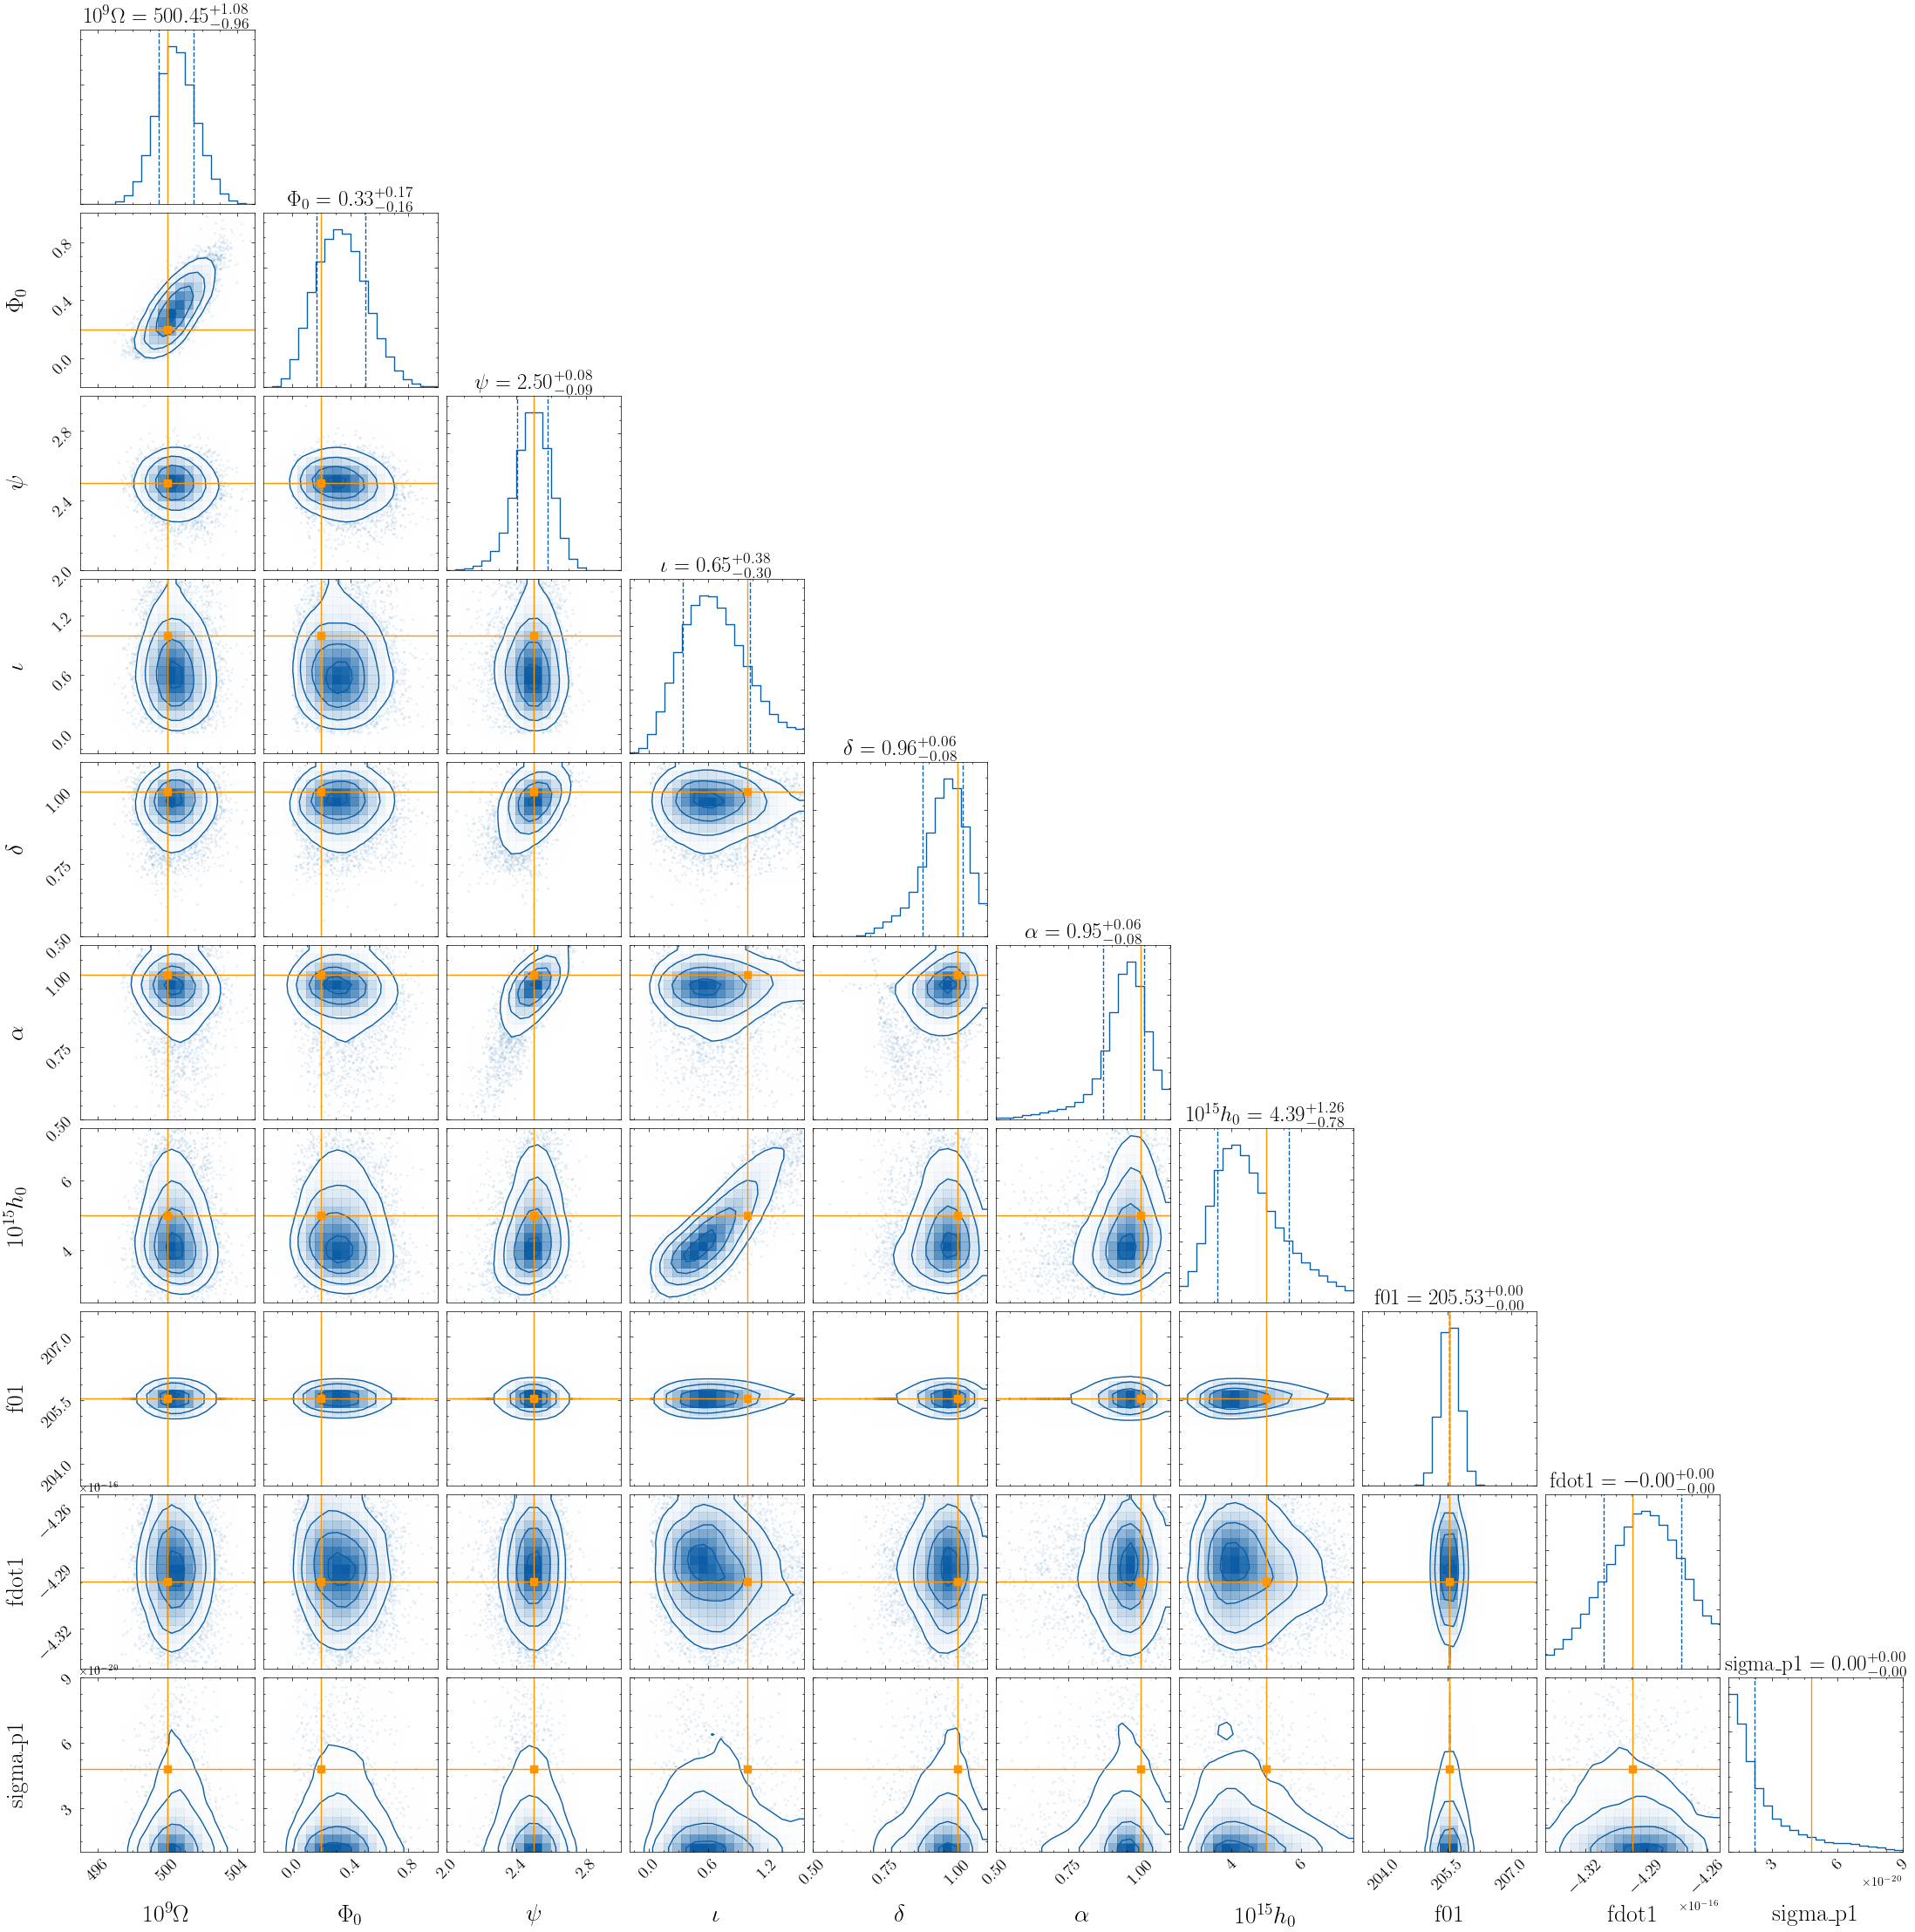

**********************************************************************


In [27]:
import glob
from plotting import plot_custom_corner
import numpy as np
list_of_files = sorted(glob.glob("../data/large_files_for_manuscript/small_h_batch/*"))



path = list_of_files[10]

val = 5e-15

ranges=[(495,505),(-0.20,1.00),(2.0,3.0),(-0.2,np.pi/2.0),(0.5,1.1),(0.5,1.1),(0.5*val*1e15,1.5*val*1e15)]
injection_parameters = [5e-7*1e9,0.20,2.50,1.0,1.0,1.0,val*1e15]


labels = [r'$10^{9} \Omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'$10^{15} h_{0}$'] 
variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]






#injected values
pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
true_f = pulsars["F0"].to_numpy()
true_fdot = pulsars["F1"].to_numpy()
seed=1255
generator = np.random.default_rng(seed)
σp = generator.uniform(low = 1e-21,high=1e-19,size=47)

psr_index = 1
psr_injections = [true_f[psr_index],true_fdot[psr_index],σp[psr_index]]
psr_vars = ["f01", "fdot1", "sigma_p1"]
psr_labs = ["f01", "fdot1", "sigma_p1"]

variables_to_plot += psr_vars
labels += psr_labs
injection_parameters += psr_injections



tol=0.01
ranges += [(true_f[psr_index]-np.abs(true_f[psr_index]*tol),true_f[psr_index]+np.abs(true_f[psr_index]*tol)), (true_fdot[psr_index]-np.abs(true_fdot[psr_index]*tol),true_fdot[psr_index]+np.abs(true_fdot[psr_index]*tol)), (1e-20,9e-20)]



axes_scales = None

#Corner plot of GW parameters
plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=None)